# Waves in Cold Plasma (Part1)

## Reminder: Fluid Equations

### Density Conservation
$$
\frac{\partial n_s}{\partial t} + \nabla \cdot (n_s \underline{V_s}) = 0
$$

### Momentum Conservation
$$
n_s m_s \left(
\frac{\partial \underline{V_s}}{\partial t} + (\underline{V}_s\cdot\nabla)\underline{V_s}
\right)
=
n_s q_s (\underline{E} + \underline{V_s} \times \underline{B})
- \nabla \cdot \underline{\underline{\Phi_s}}
$$

### Assumptions
__Goal:__ find a relationship between $\underline{J}$ and $\underline{E}$.

__Hypothesis:__ 

* We can linearize equations as $a = a_0 + \delta \tilde{a}$
* Fluid is immobile: $\underline{v_0} = \underline{0}$ -->$ \underline{v} = \delta \underline{\tilde{v_s}}$
* No static electric field: $\underline{\underline{E_{0}}}=\underline{0}$ --> $\underline{E}=\delta\underline{\tilde{E}}$
* Cold plasma: $\underline{\underline{\Phi}}=\underline{\underline{0}}$
* Oscillating solutions $e^{i \underline{k}\cdot\underline{r} - i \omega t}$

The density and momentum conservation equations lead to:

$$ \tilde{n}_s = \frac{\underline{k}\cdot \underline{\tilde{V_s}}}{\omega} n_{0s}$$

$$
\underline{\tilde{V_s}} 
= 
\frac{i q_s}{\omega m_s}
\left(
    \underline{\tilde{E}}(\underline{k},\omega) + \underline{\tilde{v_s}} \times \underline{B_{0s}}
\right)
$$

### Stix Frame
At this point we need to specify a spatial frame of reference. Let's use the so-called *Stix frame*.

* Assuming a cartesian frame with $\underline{B_0} = B_0 \underline{z}$

leads to:
$$
\underline{\tilde{V_s}} = 
\underline{\underline{\mu_s}}
\cdot
\underline{\tilde{E}}
$$
with $\underline{\underline{\mu_s}}$ the *mobility tensor*. So the perturbated current is
$$
\underline{\tilde{J}} = \sum_s n_{0s} q_s \underline{\tilde{V_s}}
= \underline{\underline{\sigma}}\cdot  \underline{\tilde{E}}
$$
with
$$
\underline{\underline{\sigma}}
=
i \frac{\varepsilon_0}{\omega} \sum_s \omega_{ps}^2 \underline{\underline{\mu_s}}
$$

Reminder: 
$$
\underline{\underline{\varepsilon}} 
= \varepsilon_0 \underline{\underline{K}} 
= \varepsilon_0 \left(\underline{\underline{I}} + \frac{i}{\omega \varepsilon_0} \underline{\underline{\sigma}}\right) 
$$
with the traditionnal notation (*Stix tensor*):
$$
\underline{\underline{K}} 
= 
\left(
\begin{matrix}
S & -iD & 0 \\
iD & S & 0 \\
0 & 0 & P
\end{matrix}
\right)
$$
with
$$
S = 1 - \sum_s \frac{\omega_{ps}^2}{\omega^2 - \Omega_{s}^2}
$$
$$
D = \sum_s \frac{\omega_{ps}^2}{\omega} \frac{\Omega_s}{\omega^2 - \Omega_{s}^2}
$$
$$
P = 1 - \sum_s \frac{\omega_{ps}^2}{\omega^2}
$$


## Magnetized Cold Plasma Dispersion Relation
__Reminder:__ the wave equation in the $k-\omega$ domain was expressed for an homogeneous plasma as:
$$
\underline{\underline{M}} \cdot \underline{E} = \underline{0}
$$
with 
$$
\underline{\underline{M}} = \underline{k} \times \underline{k} \times + \frac{\omega^2}{c^2} \underline{\underline{K}}
$$
The non trivial solution of the previous equation is obtained for $\det\underline{\underline{M}}=0$ which can be solved for $\omega(\underline{k})$, the *dispersion relation*.

Using $\underline{n}=\underline{k}/k_0=\underline{k}/(\omega/c)$, it can be expressed as:
$$
A n^4 - B n^2 + C = 0
$$

* If $A,B,C$ does not depend on $n$ (no space dispersion, i.e. cold plasma), it is a quadratic equation in $n^2$ 
    * --> At most 2 solutions, or two *modes*
* After solving for a given mode $n_{\mathrm{mode}}=n_{\mathrm{mode}} (\underline{k}, \omega)$, injecting this solution back into the wave equation leads to the non trivial solution of $\underline{E}$ and to its *polarization*.  

* Solving the general equation is generally complicated and we will look only to special cases

## Cold Unmagnetized Plasma
__Hypothesis:__

* no background magnetic field ($B_0=0$)
* infinite and homoegeneous plasma
* immovable ions (only electrons to move)
* no fluid flow at equilibrium


Which leads to two dispersion relations:

1. Transverse waves ($E_z=0$): "photons" or "light" wave: 
$$
\omega^{2} = \sum_s \omega _{ps}^{2}+k^{2}c^{2}
$$

NB : $\sum_s \omega _{ps}^{2} \approx \omega _{pe}^{2}$

Text(0, 0.5, '$\\omega_p$')

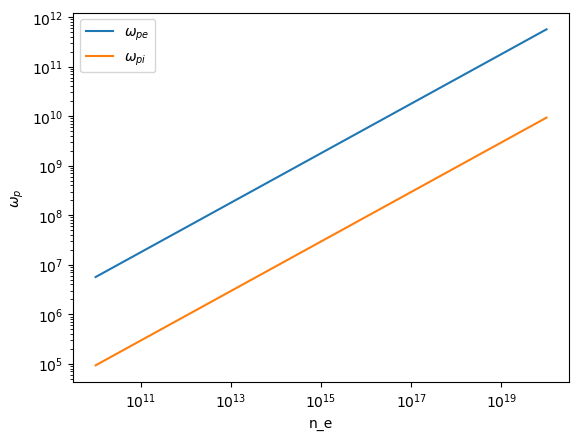

In [2]:
import plasmapy as pp; import numpy as np; import astropy.units as u ; import matplotlib.pyplot as plt
ne = np.logspace(10, 20, 100) / u.m**3
fig, ax = plt.subplots()
ax.loglog(ne, pp.formulary.frequencies.plasma_frequency(n=ne, particle='e-'), label='$\omega_{pe}$')
ax.loglog(ne, pp.formulary.frequencies.plasma_frequency(n=ne, particle='D+'), label='$\omega_{pi}$')
ax.legend(); ax.set_xlabel('n_e'); ax.set_ylabel('$\omega_p$')

### Numerical Application: Ionospheric Plasma

In [3]:
from scipy.constants import c
ne = 1e11 / u.m**3
f = np.logspace(5, 7, 1000)
omega = 2*np.pi*f
omega_pe = pp.formulary.frequencies.plasma_frequency(n=ne, particle='e-')
k = 1/c * np.sqrt(omega**2 - omega_pe.value**2, dtype='complex')

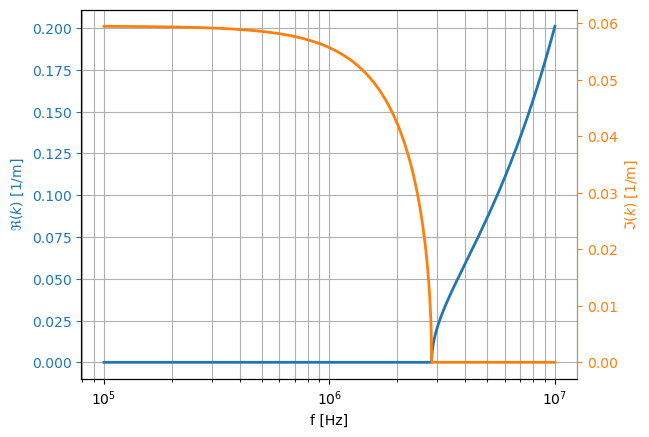

In [4]:
fig, ax = plt.subplots()
ax.semilogx(f, k.real, lw=2); ax.set_ylabel('$\Re(k)$ [1/m]');
ax2 = ax.twinx(); ax.grid(True, which='both')
ax2.semilogx(f, k.imag, color='C1', lw=2);
ax.set_xlabel('f [Hz]'); ax2.set_ylabel('$\Im(k)$ [1/m]');
ax.yaxis.label.set_color('C0'); ax2.yaxis.label.set_color('C1')
ax.spines["right"].set_edgecolor('C0'); ax2.spines["right"].set_edgecolor('C1')
ax.tick_params(axis='y', colors='C0'); ax2.tick_params(axis='y', colors='C1')

### Cosmic gamma-ray bursts Impacting our Ionosphere
* *Cosmic gamma-ray bursts* (GRBs) are bursts of energetic gamma radiation produced by the violent explosions of distant stars. 
* GRBs are interesting because of their effects on the Earth’s atmosphere and the near-Earth space environment.
* The burst of gamma-rays from a GRB interacts with the upper atmosphere and lower ionosphere, depositing its energy and ionizing atoms and molecules.
* This ionization is in addition to natural ionization due to ultraviolet light from the sun and cosmic rays and acts to change the conductivity of the upper atmosphere.
* The change in conductivity is visible as a change in the way VLF radio waves reflect from the ionosphere
<img src="figures/2022-10-09_Brightest_Gamma-Ray_Burst .gif" width="200"/>

* <a href="https://skyandtelescope.org/astronomy-news/brightest-gamma-ray-burst-yet-lit-up-the-sky/">09/10/2022 GRB</a> (brightest detected so far) exploded in a galaxy about 2 billion light-years away, likely due to the collapse of a massive star, giving birth to a black hole:

<img src="figures/2022-10-09_GRB-221009A-Afterglow-589x600.jpg" width="200" alt="GRB 221009A. Neil Gehrels Swift Observatory. The dark vertical line is an artifact that comes from a dead column of pixels in the camera. NASA / Swift / A. Beardmore (Univ. of Leicester)" />

* The intense burst disturbed Earth’s upper atmosphere where its high-energy photons ionized the ionosphere and modified its radio-propagation properties.

<img src="figures/2022-10-09_GRB_effect.jpg" alt="Indian Lightning Detection Network and The VLF-monitor at Todmorden (UK)" width="600"/>
